In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
# Removing the first column
df = df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
df.shape

(100, 3)

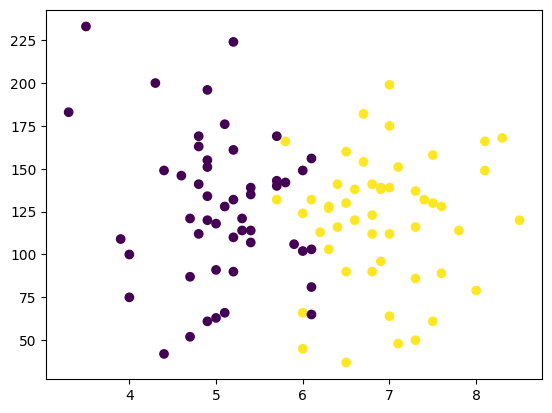

In [ ]:
#EDA
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
#logistic Learning Machine Learning Model cgpa and iq are independent variable and placement is dependent variable

In [ ]:
x= df.iloc[:,0:2]
y=df.iloc[:,2:]

In [ ]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
# Train the split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [ ]:
x_train

,cgpa,iq
58,8.0,79.0
60,6.9,139.0
11,6.9,138.0
77,7.3,50.0
51,4.8,141.0
...,...,...
14,6.1,103.0
0,6.8,123.0
80,4.9,196.0
78,6.1,81.0


In [ ]:
# scale the value
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_train

array([[ 1.75998285, -1.13040767],
       [ 0.79360292,  0.38880622],
       [ 0.79360292,  0.36348599],
       [ 1.1450138 , -1.86469439],
       [-1.05130423,  0.43944669],
       [-0.61204063, -0.24419957],
       [-1.754126  , -0.59868281],
       [ 0.61789747,  1.47757618],
       [ 0.35433931, -0.1935591 ],
       [ 0.26648659, -0.52272211],
       [ 1.23286652,  0.2115646 ],
       [ 0.00292842,  0.00900275],
       [-0.69989335,  0.2115646 ],
       [-2.36909505,  1.50289641],
       [ 1.1450138 ,  0.33816576],
       [-0.17277702,  1.07245247],
       [ 0.88145564, -1.51021114],
       [-1.84197873, -0.37080072],
       [-0.87559879, -1.53553138],
       [ 1.84783557,  1.07245247],
       [ 1.1450138 , -0.1935591 ],
       [ 0.00292842,  0.64200854],
       [-1.05130423,  0.99649178],
       [-0.5241879 ,  0.38880622],
       [ 0.7057502 ,  0.43944669],
       [ 0.00292842, -1.45957068],
       [ 1.40857197,  0.11028368],
       [-0.96345151, -1.58617184],
       [-0.69989335,

In [ ]:
x_test=scaler.transform(x_test)
# y_train = scaler.fit_transform(y_train)
# y_test = scaler.transform(y_test)

In [ ]:
# call classifier
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [ ]:
#model Train

# Now you can use y_train_values for training
clf.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_predict=clf.predict(x_test)
y_predict

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
y_test

,placement
96,0
44,1
49,0
83,1
39,0
35,1
52,1
8,0
40,0
47,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9

<Axes: >

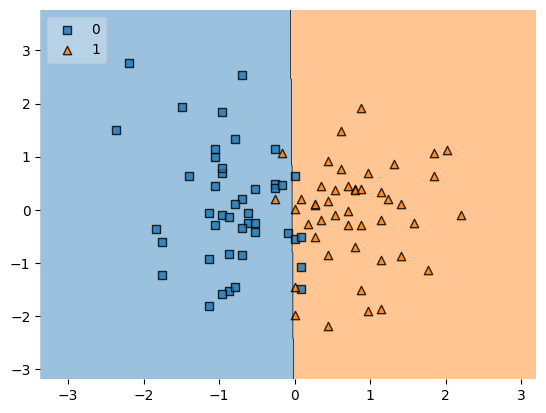

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values.ravel(), clf=clf, legend=2)

In [ ]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))